# Diabetes analysis
Data analysis based on diabetes.csv downloaded from Kaggle. <br>
Data source: https://www.kaggle.com/uciml/pima-indians-diabetes-database


Diabetes is a metabolic disorder characterising in high glucose level in blood. It results from wrong insulin production or its wrong metabolism in cells. 

The goal of this analysis is to create a model which would predict if the person has diabetes or not based on some blood and person's parameters. This is my second analysis for the same database but this time I will exclude some of the data from further analysis to see what happens.

# Import and prepare the data

In [49]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

data = pd.read_csv('FILES/diabetes.csv', sep=',')
data.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
121,6,111,64,39,0,34.2,0.260,24,0
247,0,165,90,33,680,52.3,0.427,23,0
476,2,105,80,45,191,33.7,0.711,29,1
325,1,157,72,21,168,25.6,0.123,24,0
207,5,162,104,0,0,37.7,0.151,52,1
214,9,112,82,32,175,34.2,0.260,36,1
540,8,100,74,40,215,39.4,0.661,43,1
102,0,125,96,0,0,22.5,0.262,21,0
283,7,161,86,0,0,30.4,0.165,47,1
719,5,97,76,27,0,35.6,0.378,52,1


The code above simply reads the .csv file and stores the data in data variable. Now let's take a look on the data and count NaNs or 0 values.

In [50]:
# describing the dataset
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [51]:
# checking information about the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [52]:
# checking null values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [53]:
# checking how many of each columns are 0's
for c in data.columns:
    print(c + ': ' + str(data[data[c] == 0][c].count()))

Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


There can be women with no pregnancies, but data for Glucose, BloodPressure, SkinThickness, Insulin and BMI is incomplete.<br>Now let's see how many patients did have diabetes.

In [54]:
# outcome count:
data['Outcome'].value_counts(normalize=True) * 100

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

OK, so now we know that 65% of dataset did not have diabetes against 35% who had. I assume that people who had diabetes have different values of parameters than people who did not have it. That is why I change 0's with median for corresponding value. But, as there is too many NaN's in SkinThickness and Insulin, I will not take them into further consideration.

In [58]:
# removing SkinThickness and Insulin from further analysis
data = data[['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']]

In [59]:
# changing 0's to NaN so that they do not change the median value
for c in ['Glucose', 'BloodPressure', 'BMI']:
    data[c].replace(0, np.NaN, inplace=True)

In [60]:
# check if correct number of cells has been changed
data.isnull().sum()

Pregnancies                  0
Glucose                      5
BloodPressure               35
BMI                         11
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

In [61]:
# how it looks in dataframe
data.sample(10)

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
208,1,96.0,64.0,33.2,0.289,21,0
142,2,108.0,52.0,32.5,0.318,22,0
288,4,96.0,56.0,20.8,0.340,26,0
456,1,135.0,54.0,26.7,0.687,62,0
486,1,139.0,62.0,40.7,0.536,21,0
276,7,106.0,60.0,26.5,0.296,29,1
98,6,93.0,50.0,28.7,0.356,23,0
595,0,188.0,82.0,32.0,0.682,22,1
70,2,100.0,66.0,32.9,0.867,28,1
437,5,147.0,75.0,29.9,0.434,28,0


In [62]:
# print actual medians grouped by outcome
data.groupby('Outcome').median()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,
0,2,107.0,70.0,30.1,0.336,27
1,4,140.0,74.5,34.3,0.449,36


In [63]:
# change NaN's to corresponding median
for c in ['Glucose', 'BloodPressure', 'BMI']:
    data.loc[(data['Outcome'] == 0) & (data[c].isnull()), c] = data[data['Outcome'] == 0][c].median() 
    data.loc[(data['Outcome'] == 1) & (data[c].isnull()), c] = data[data['Outcome'] == 1][c].median() 
data.isnull().sum()             

Pregnancies                 0
Glucose                     0
BloodPressure               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [64]:
# print actual medians grouped by outcome
data.groupby('Outcome').median()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,
0,2,107.0,70.0,30.1,0.336,27
1,4,140.0,74.5,34.3,0.449,36


In [65]:
data.groupby('Outcome').describe()

Pregnancies                                                Glucose  \
              count      mean       std  min   25%  50%  75%   max   count   
Outcome                                                                      
0             500.0  3.298000  3.017185  0.0  1.00  2.0  5.0  13.0   500.0   
1             268.0  4.865672  3.741239  0.0  1.75  4.0  8.0  17.0   268.0   

                     ... DiabetesPedigreeFunction           Age             \
               mean  ...                      75%    max  count       mean   
Outcome              ...                                                     
0        110.622000  ...                  0.56175  2.329  500.0  31.190000   
1        142.302239  ...                  0.72800  2.420  268.0  37.067164   

                                                  
               std   min   25%   50%   75%   max  
Outcome                                           
0        11.667655  21.0  23.0  27.0  37.0  81.0  
1        10.968254  21.0  28.0  36.0  44.0  70.0  

[2 rows x 48 columns]

# Data visualisation

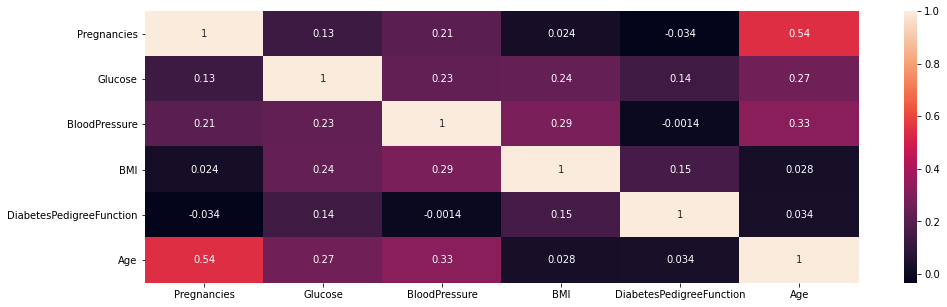

In [67]:
corrMatrix = data.iloc[:,0:6].corr()
plt.figure(figsize = (16,5))
sns.heatmap(corrMatrix, annot=True) 
plt.show()

From correlation matrix we see that there is a high correlation between Age and Pregnancies (0.54). Let's see how these parameters look on a scatter plot.

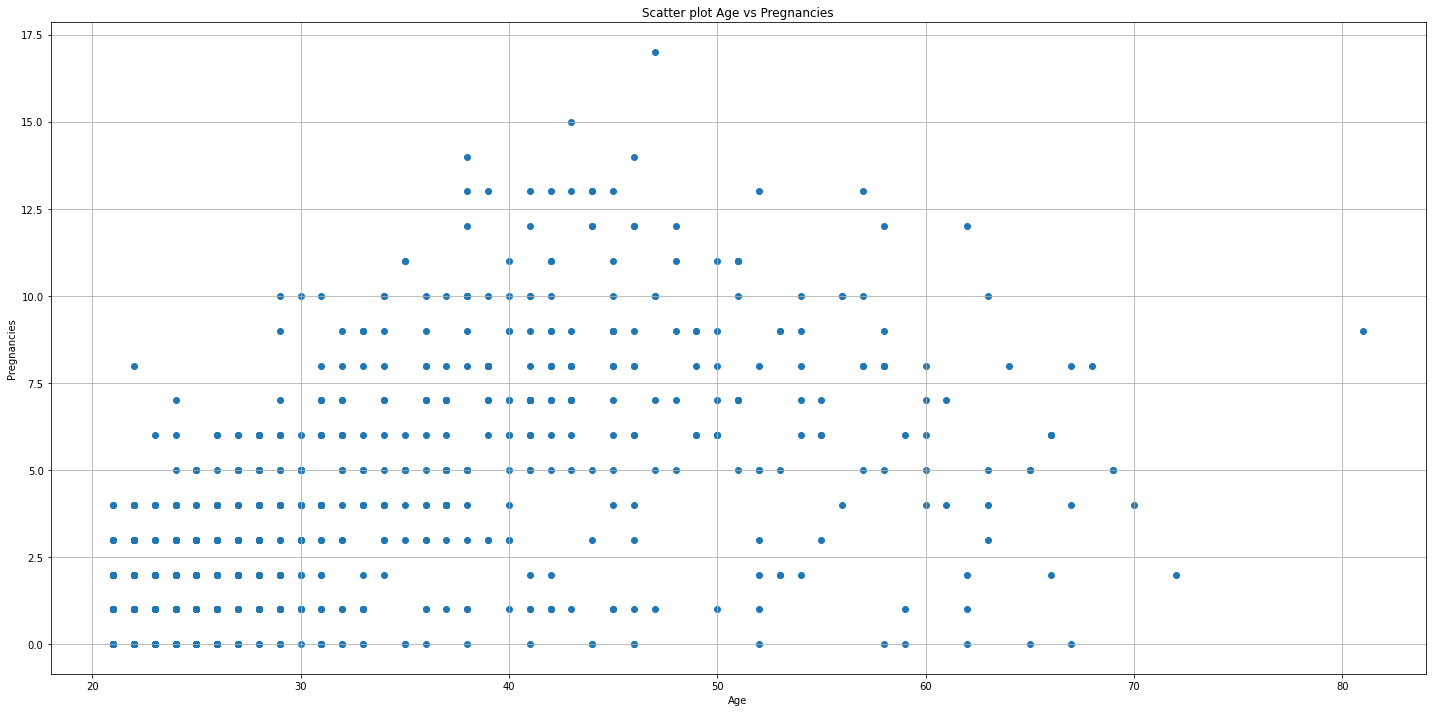

In [68]:
plt.figure(figsize=(20,10))
plt.scatter(x=data['Age'], y=data['Pregnancies'])
plt.grid(True)
plt.xlabel('Age')
plt.ylabel('Pregnancies')
plt.title('Scatter plot Age vs Pregnancies')
plt.tight_layout() 
plt.show()

Maybe it will be good to see the scatter plots for each outcome separately. 

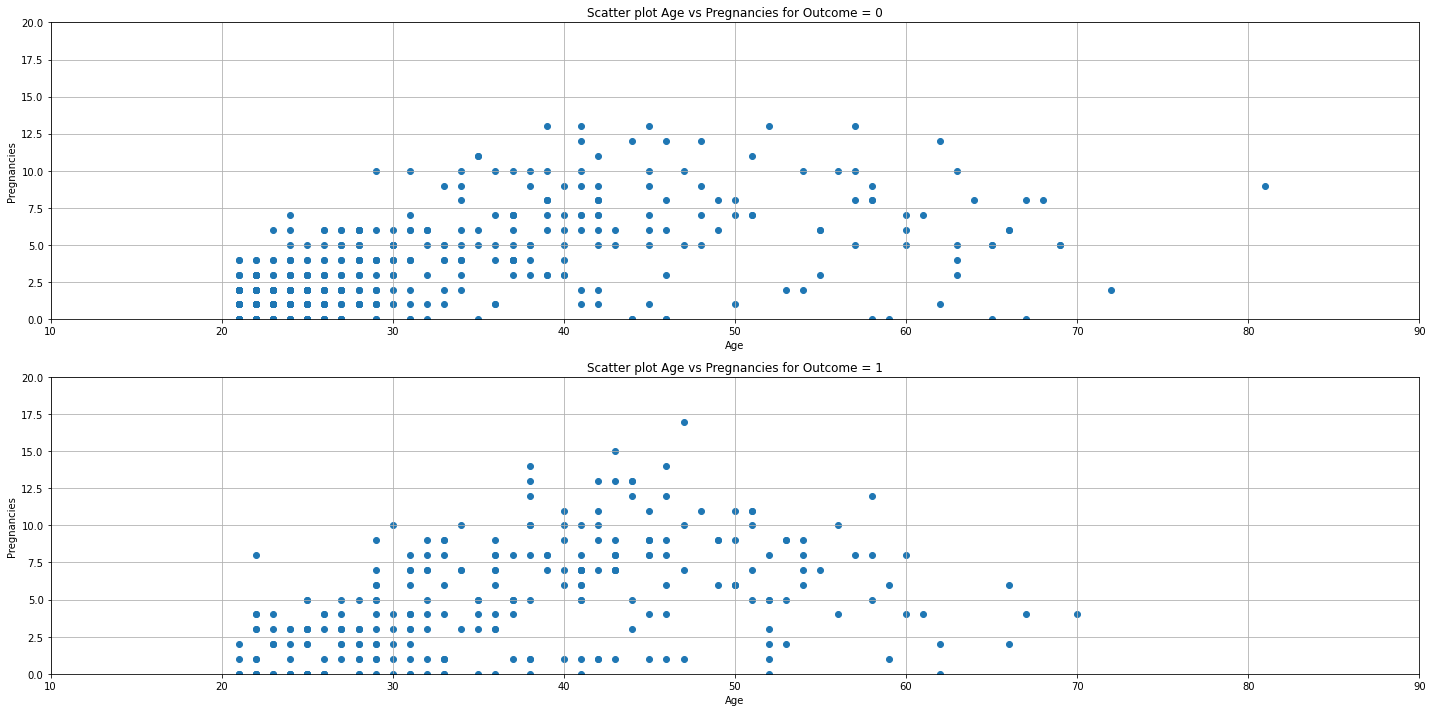

In [70]:
plt.figure(figsize=(20,10))
plt.subplot(211) 
plt.scatter(x=data[data['Outcome'] == 0]['Age'], y=data[data['Outcome'] == 0]['Pregnancies'])
plt.grid(True)
plt.xlabel('Age')
plt.xlim(10,90)
plt.ylim(0,20)
plt.ylabel('Pregnancies')
plt.title('Scatter plot Age vs Pregnancies for Outcome = 0')

plt.subplot(212) 
plt.scatter(x=data[data['Outcome'] == 1]['Age'], y=data[data['Outcome'] == 1]['Pregnancies'])
plt.grid(True)
plt.xlabel('Age')
plt.xlim(10,90)
plt.ylim(0,20)
plt.ylabel('Pregnancies')
plt.title('Scatter plot Age vs Pregnancies for Outcome = 1')

plt.tight_layout() 
plt.show()

We can see also histograms for each parameter but separately for Outcome = 1 and Outcome = 0.

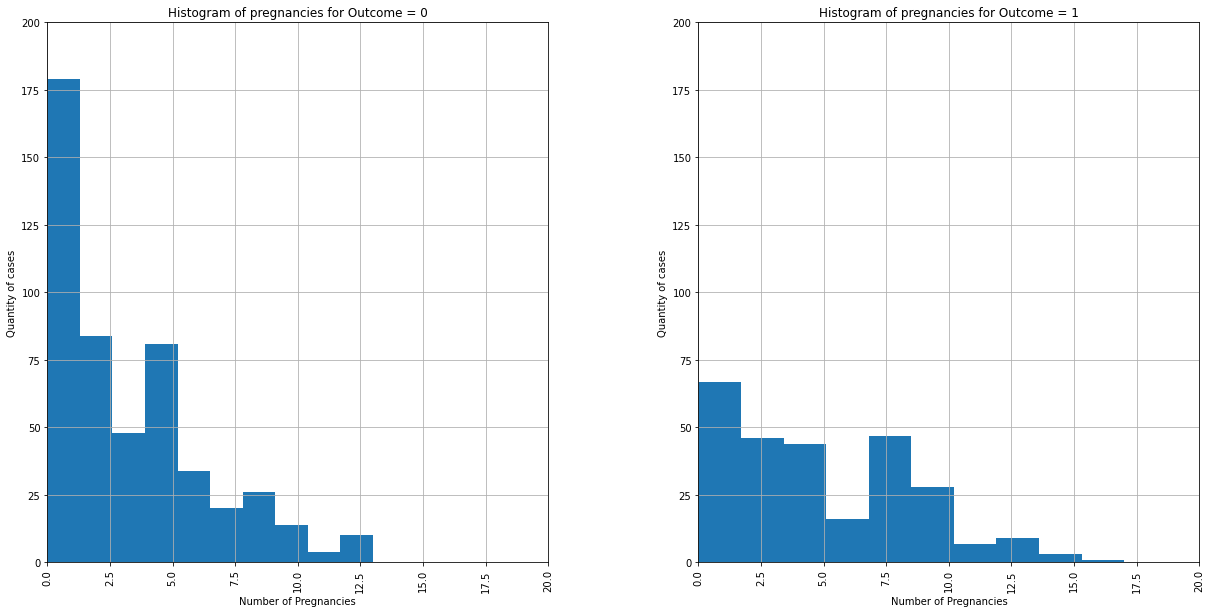

In [71]:
# histogram for pregnancies
# different histograms for Outcome = 1 and Outcome = 0

hist_preg = data.hist(column='Pregnancies', by='Outcome', bins=10, xlabelsize=None, figsize=(20,10));
hist_preg[0].grid(True)
hist_preg[0].set_xlim(0,20)
hist_preg[0].set_ylim(0,200)
hist_preg[0].set_xlabel('Number of Pregnancies')
hist_preg[0].set_ylabel('Quantity of cases')
hist_preg[0].set_title('Histogram of pregnancies for Outcome = 0')

hist_preg[1].grid(True)
hist_preg[1].set_xlim(0,20)
hist_preg[1].set_ylim(0,200)
hist_preg[1].set_xlabel('Number of Pregnancies')
hist_preg[1].set_ylabel('Quantity of cases')
hist_preg[1].set_title('Histogram of pregnancies for Outcome = 1');


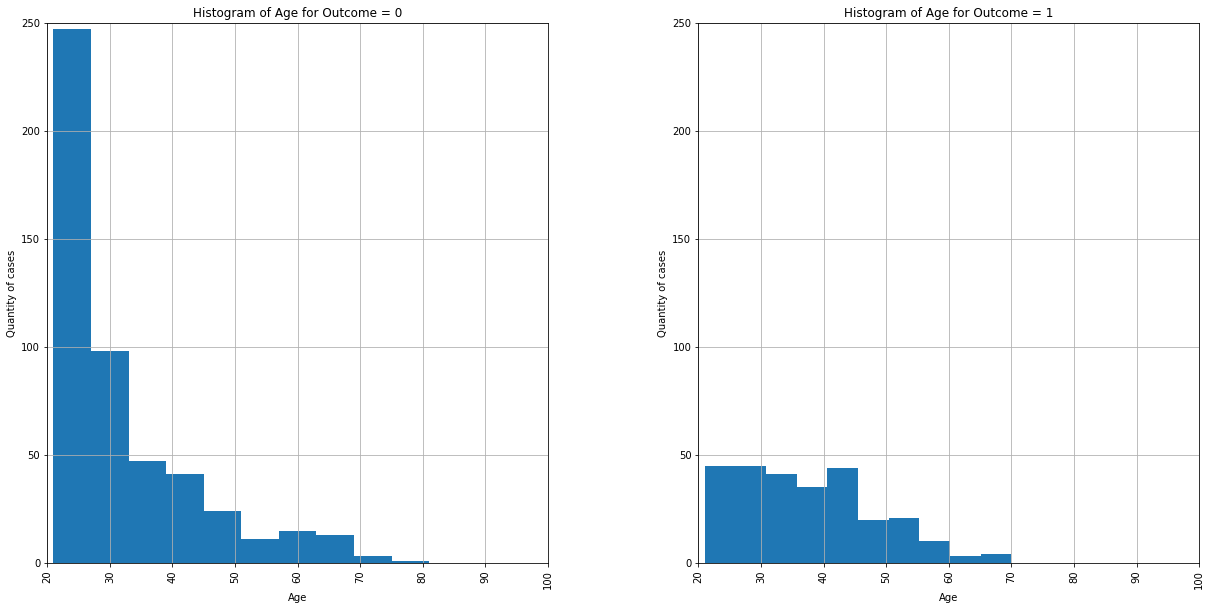

In [72]:
# histogram for Age
# different histograms for Outcome = 1 and Outcome = 0

hist_age = data.hist(column='Age', by='Outcome', bins=10, figsize=(20,10))
hist_age[0].grid(True)
hist_age[0].set_xlim(20,100)
hist_age[0].set_ylim(0,250)
hist_age[0].set_xlabel('Age')
hist_age[0].set_ylabel('Quantity of cases')
hist_age[0].set_title('Histogram of Age for Outcome = 0')

hist_age[1].grid(True)
hist_age[1].set_xlim(20,100)
hist_age[1].set_ylim(0,250)
hist_age[1].set_xlabel('Age')
hist_age[1].set_ylabel('Quantity of cases')
hist_age[1].set_title('Histogram of Age for Outcome = 1');

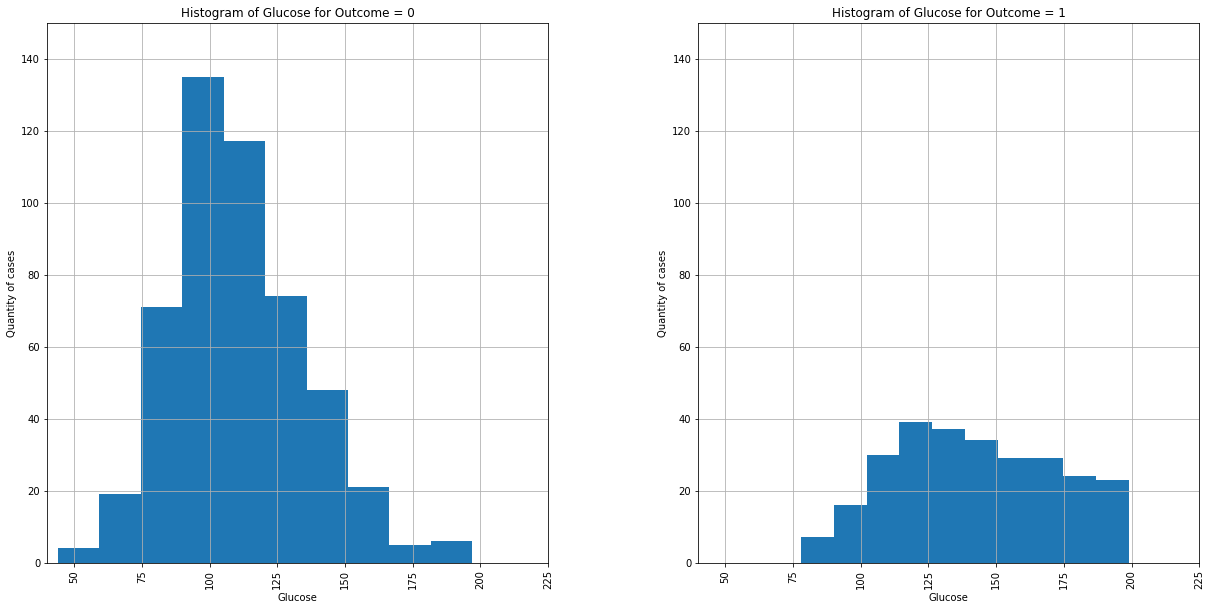

In [73]:
# histogram for Glucose
# different histograms for Outcome = 1 and Outcome = 0
hist_glucose = data.hist(column='Glucose', by='Outcome', bins=10, figsize=(20,10))
hist_glucose[0].grid(True)
hist_glucose[0].set_xlim(40,225)
hist_glucose[0].set_ylim(0,150)
hist_glucose[0].set_xlabel('Glucose')
hist_glucose[0].set_ylabel('Quantity of cases')
hist_glucose[0].set_title('Histogram of Glucose for Outcome = 0')

hist_glucose[1].grid(True)
hist_glucose[1].set_xlim(40,225)
hist_glucose[1].set_ylim(0,150)
hist_glucose[1].set_xlabel('Glucose')
hist_glucose[1].set_ylabel('Quantity of cases')
hist_glucose[1].set_title('Histogram of Glucose for Outcome = 1');

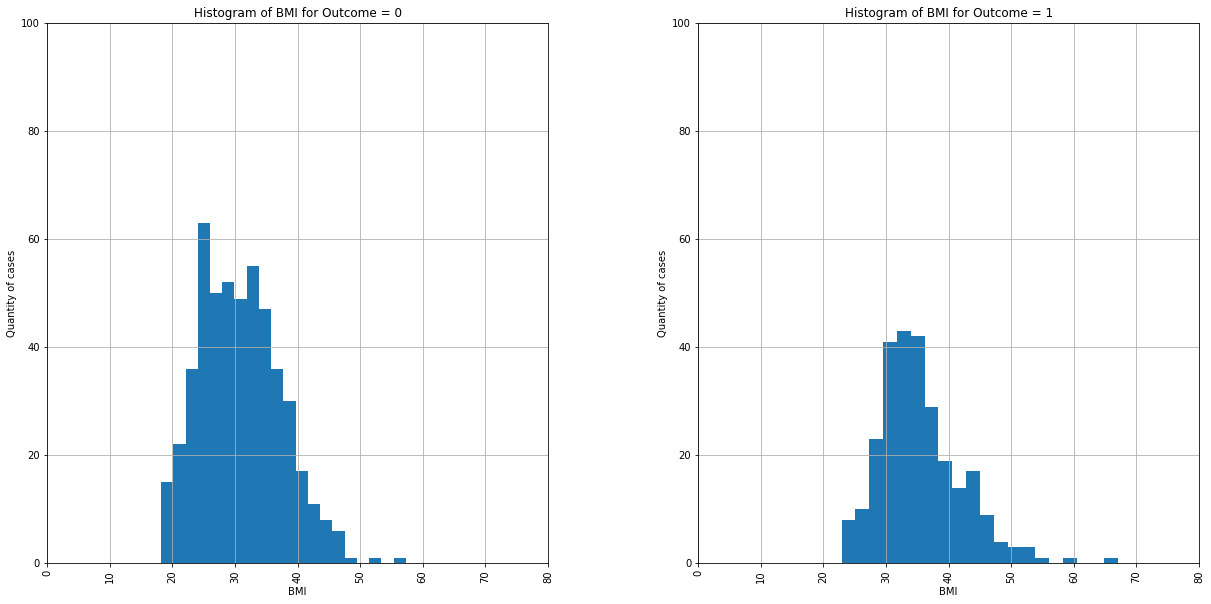

In [74]:
# histogram for BMI
# different histograms for Outcome = 1 and Outcome = 0
hist_BMI = data.hist(column='BMI', by='Outcome', bins=20, figsize=(20,10))

hist_BMI[0].grid(True)
hist_BMI[0].set_xlim(0,80)
hist_BMI[0].set_ylim(0,100)
hist_BMI[0].set_xlabel('BMI')
hist_BMI[0].set_ylabel('Quantity of cases')
hist_BMI[0].set_title('Histogram of BMI for Outcome = 0')

hist_BMI[1].grid(True)
hist_BMI[1].set_xlim(0,80)
hist_BMI[1].set_ylim(0,100)
hist_BMI[1].set_xlabel('BMI')
hist_BMI[1].set_ylabel('Quantity of cases')
hist_BMI[1].set_title('Histogram of BMI for Outcome = 1');

Histogram for outcome = 1 is always more to the right than for outcome = 0.

# Creating a model

Now I will try to create test and train data to train classification model and test its accuracy. So the next steps are:
* normalize the data
* create train and test data
* try to make a classification 
* test it and check the accuracy of the model

In [75]:
# import needed libraries form sklearn

# preprocessing to normalize the data
from sklearn import preprocessing

# test_train_split
from sklearn.model_selection import train_test_split

# K-neighbors classifier
from sklearn.neighbors import KNeighborsClassifier

# metrics to check how accurate is the model
from sklearn import metrics

## Normalize the data

In [76]:
# normalize the data
X = data[['Pregnancies', 'Glucose', 
          'BloodPressure', 'BMI', 
          'DiabetesPedigreeFunction', 'Age']]
y = data['Outcome']
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

## Divide the data in parts for training and testing 

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (537, 6) (537,)
Test set: (231, 6) (231,)


## First training for the model

In [78]:
k = 4
# Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)
print(yhat)

[0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1
 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 0 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1
 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1
 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0]


## Accuracy for the first model (k = 4)

In [79]:
print("Train set Accuracy: " + str(round(100 * metrics.accuracy_score(y_train, neigh.predict(X_train)), 2)) + "%")
print("Test set Accuracy:  " + str(round(100 * metrics.accuracy_score(y_test, yhat), 2)) + "%")

Train set Accuracy: 80.45%
Test set Accuracy:  74.03%


## Testing accuracy for different k

In [80]:
Ks = 30
mean_acc = np.zeros(Ks - 1)
std_acc = np.zeros(Ks - 1)

for n in range(1,Ks):
    # Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = round(100 * metrics.accuracy_score(y_test, yhat), 2)
    std_acc[n-1] = round(100 * np.std(yhat==y_test)/np.sqrt(yhat.shape[0]), 2)

print(mean_acc)
print(std_acc)

[68.83 70.56 72.29 74.03 77.06 76.62 75.76 74.46 75.32 77.92 77.92 79.22
 78.35 78.35 78.79 80.52 80.95 80.52 80.09 78.79 78.79 80.09 80.52 79.22
 78.79 80.09 78.79 79.65 77.92]
[3.05 3.   2.94 2.89 2.77 2.78 2.82 2.87 2.84 2.73 2.73 2.67 2.71 2.71
 2.69 2.61 2.58 2.61 2.63 2.69 2.69 2.63 2.61 2.67 2.69 2.63 2.69 2.65
 2.73]


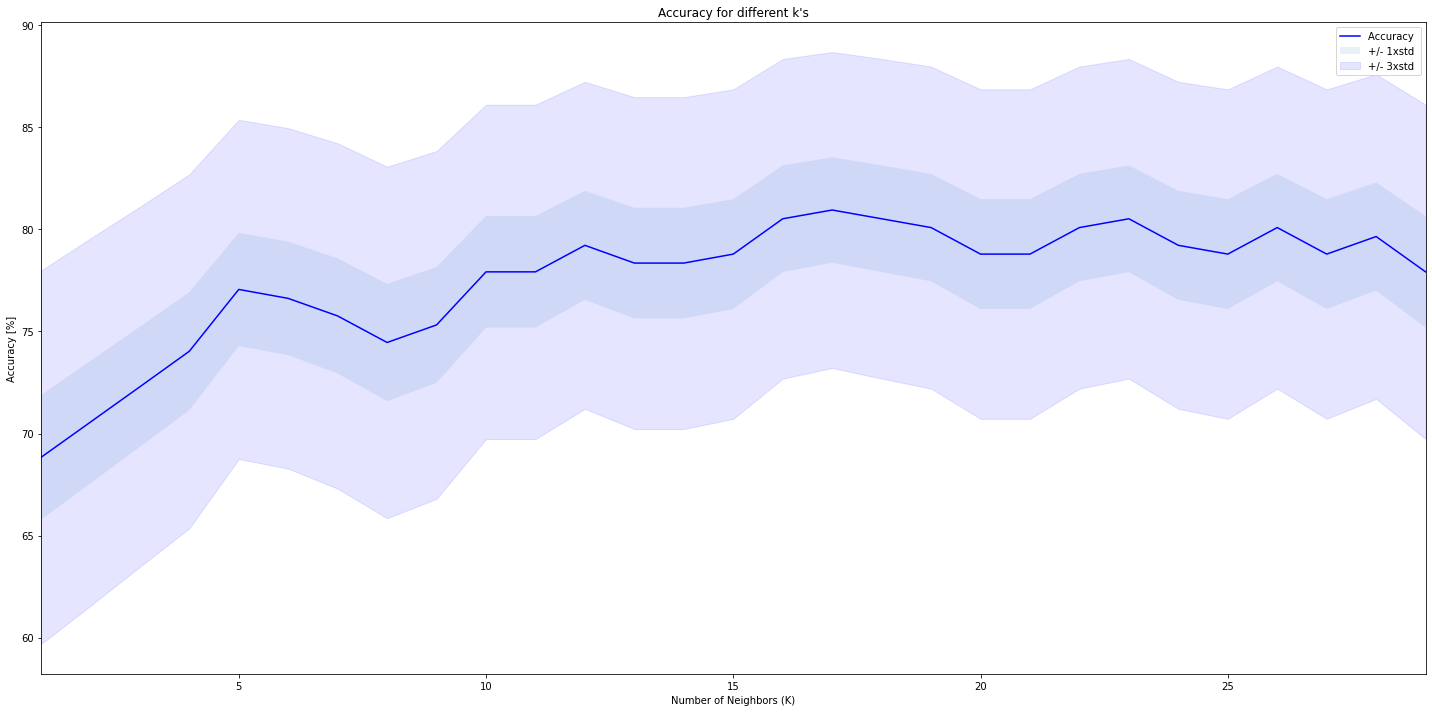

In [81]:
plt.figure(figsize=(20,10))
plt.plot(range(1,Ks),mean_acc,'b')
plt.fill_between(range(1,Ks), mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks), mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10, color="blue")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy [%]')
plt.xlabel('Number of Neighbors (K)')
plt.xlim(1, Ks - 1)
plt.title("Accuracy for different k's")
plt.tight_layout()
plt.show()

In [82]:
print( "The best accuracy was " + str(mean_acc.max()) + "% for k = " + str(mean_acc.argmax() + 1) + ".") 

The best accuracy was 80.95% for k = 17.


# Conclusion

I managed to build a model with accuracy > 80%. The source of the model is k-neighbors algorithm. Best accuracy for test data was for k = 17.

This analysis was a try with exclusion of two columns which had a lot of NaNs in the original dataset. Comparing the result to result of diabetes_1, clearly the accuracy of the model is worse, so it is not worth excluding the data.